<a href="https://colab.research.google.com/github/alizmarossy/FAKT_ML/blob/main/hatodik_miniprojekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tőzsde predikció rekurrens hálóval

A házi projektet a 

https://towardsdatascience.com/predicting-stock-prices-using-a-keras-lstm-model-4225457f0233

oldal útmutatása alapján készítem el.

##Szükséges packagek importálása

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

##Adattábla betöltése és vizsgálata

Tata Global Beverage legutóbbi részvényárainak vizsgálata

In [2]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
dataset_train.head().T

,0,1,2,3,4
Date,2018-09-28,2018-09-27,2018-09-26,2018-09-25,2018-09-24
Open,234.05,234.55,240.0,233.3,233.55
High,235.95,236.8,240.0,236.75,239.2
Low,230.2,231.1,232.5,232.0,230.75
Last,233.5,233.8,235.0,236.25,234.0
Close,233.75,233.25,234.25,236.1,233.3
Total Trade Quantity,3069914,5082859,2240909,2349368,3423509
Turnover (Lacs),7162.35,11859.95,5248.6,5503.9,7999.55


In [6]:
dataset_train.isna().sum()
#milyen kellemes kis dataset

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [10]:
dataset_train.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

##Adattábla formázása

###Normalizálás

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

###Késleltetés beépítése

In [14]:
X_train = []
y_train = []
for i in range(60, 2035):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
Y_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

##LSTM modell megépítése

In [16]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
62/62 [==============================] - 15s 121ms/step - loss: 0.0088
Epoch 2/100
62/62 [==============================] - 7s 120ms/step - loss: 0.0031
Epoch 3/100
62/62 [==============================] - 7s 121ms/step - loss: 0.0026
Epoch 4/100
62/62 [==============================] - 7s 121ms/step - loss: 0.0026
Epoch 5/100
62/62 [==============================] - 8s 133ms/step - loss: 0.0029
Epoch 6/100
62/62 [==============================] - 8s 128ms/step - loss: 0.0023
Epoch 7/100
62/62 [==============================] - 7s 121ms/step - loss: 0.0021
Epoch 8/100
62/62 [==============================] - 7s 120ms/step - loss: 0.0019
Epoch 9/100
62/62 [==============================] - 7s 119ms/step - loss: 0.0019
Epoch 10/100
62/62 [==============================] - 7s 119ms/step - loss: 0.0017
Epoch 11/100
62/62 [==============================] - 8s 121ms/step - loss: 0.0020
Epoch 12/100
62/62 [==============================] - 8s 128ms/step - loss: 0.0017
Epoch 13/100

###Teszt adatbázisra történő előrejelzések

In [17]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values

In [20]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

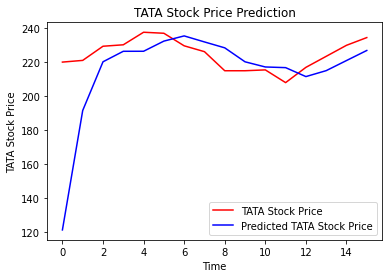

In [24]:
plt.plot(real_stock_price, color = 'red', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

Ez csodálatos! Az LSTM modell tényleg képes az előrejelzésre! 😊